
# DESC SN Ia metric # 

# u/pgris/nsnmetric  gamma_WFD.hdf5 with proper dust extinction, removed old telescope class#

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp
import pandas as pd

import rubin_sim.maf as maf
from rubin_sim.data import get_baseline
import time

In [2]:
# Baseline Survey
baseline_file = 'shave_25_v2.1_10yrs.db' #get_baseline()
runName = os.path.split(baseline_file)[-1].replace('.db', '')

print(runName)

shave_25_v2.1_10yrs


In [3]:
# Set up output
outDir = 'sn'
resultsDb = maf.db.ResultsDb(outDir=outDir)

In [4]:
plotDict = {'percentileClip': 95., 'nTicks': 5}

sne_nside = 2
sn_summary = [maf.MedianMetric(), maf.MeanMetric(),
              maf.SumMetric(metricName='Total detected')]
slicer = maf.HealpixSlicer(nside=sne_nside, useCache=False)
metric = maf.SNNSNMetric(verbose=False, gammaName='gamma_WFD.hdf5')  
bundle = maf.MetricBundle(metric, slicer, None, plotDict=plotDict, 
                        summaryMetrics=sn_summary)

bg = maf.MetricBundleGroup({'sn': bundle}, baseline_file, outDir, resultsDb)

Healpix slicer using NSIDE=2, approximate resolution 1758.969043 arcminutes
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 20774 799 26
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 78302 799 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 50337 799 63
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 62322 799 78
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 72709 799 91
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 20774 799 26
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 78302 799 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 50337 799 63
Loading

Querying table None with no constraint for columns ['observationId', 'observationStartMJD', 'rotSkyPos', 'visitExposureTime', 'night', 'numExposures', 'fieldRA', 'fieldDec', 'fiveSigmaDepth', 'filter', 'visitTime'].
Found 2383592 visits
Running:  ['sn']


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/maps/dustMap.py:42: UserWarning: Slicer value of nside 2 different from map value 128, using slicer value
  warnings.warn(


Completed metric generation.
Running reduce methods.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/metricBundles/metricBundle.py:738: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  if val == newmetric.badval:


Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:584: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


Plotting complete.
runtime= 946.7199058532715 s


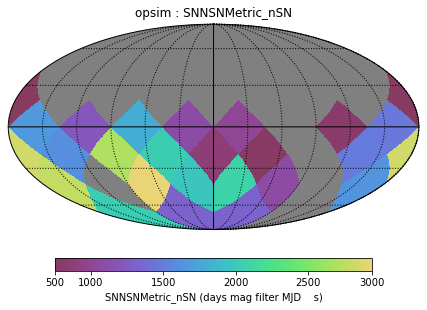

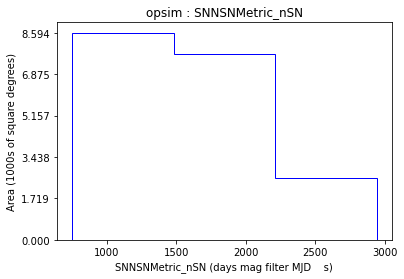

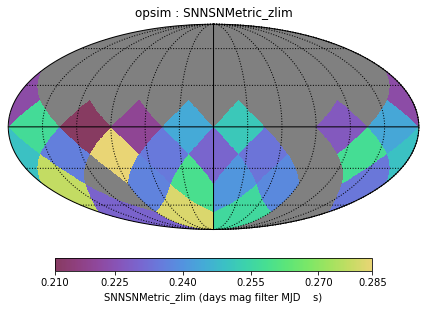

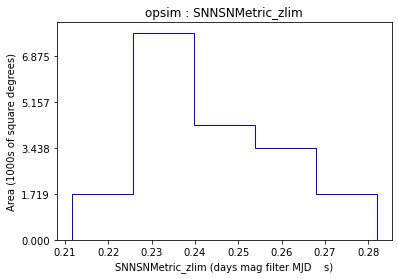

In [5]:
t1 = time.time()
bg.runAll()     
t2 = time.time()
bg.plotAll(closefigs=False)
print('runtime=', t2-t1, 's')

In [6]:
bundle.metricValues.compressed()[0]

rec.array([(728.141219, 0.222819)],
          dtype=[('nSN', '<f8'), ('zlim', '<f8')])

In [7]:
# The 'reduce' values of the metric got stored in the bundle dict in the bungle group 
bg.bundleDict

{'sn': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x7fc8a3269ee0>,
 'SNNSNMetric_nSN': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x7fc807bc9b20>,
 'SNNSNMetric_zlim': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x7fc8a32a01c0>}

In [8]:
# The nSN and zlim values are pulled out in those reduce methods, into their own bundles.
bdict = bg.bundleDict
print(bdict['SNNSNMetric_nSN'].metricValues.compressed())
np.median(bdict['SNNSNMetric_nSN'].metricValues.compressed())

[ 728.141219 1085.496311 1796.400659 1206.376283 1668.245011 1468.064177
  806.227005 1013.679435  863.373439 2030.688822 2704.366484 1609.813088
 2837.827589 1482.458211  769.135612 1963.376788 3080.577908 2782.092873
 1642.839606 1076.769033 2083.036643 1310.946175 2031.518646 1320.14239 ]


1546.1356495

In [9]:
bdict['SNNSNMetric_zlim'].metricValues.compressed()

array([0.222819 , 0.2443495, 0.219692 , 0.2008285, 0.257267 , 0.2438625,
       0.2268885, 0.251233 , 0.230063 , 0.2348005, 0.284666 , 0.235871 ,
       0.2494055, 0.257799 , 0.233624 , 0.2589145, 0.236715 , 0.276892 ,
       0.234248 , 0.238056 , 0.240548 , 0.279875 , 0.2298835, 0.256339 ])